<a href="https://colab.research.google.com/github/nandinikumawat/Natural-Language-Generation-Application/blob/main/Taylor_Swift_Lyrics_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import sys 
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Activation, Flatten, Dropout, Dense, Embedding, TimeDistributed
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import tensorflow as tf

In [ ]:
#loading dataset
dataset = pd.read_csv('taylor_swift_lyrics.csv', encoding = "latin1")


In [ ]:
#displaying first 20 rows of the daaset
dataset.head(20)

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006
5,Taylor Swift,Taylor Swift,Tim McGraw,1,On backroads at night,6,2006
6,Taylor Swift,Taylor Swift,Tim McGraw,1,And I was right there beside him all summer long,7,2006
7,Taylor Swift,Taylor Swift,Tim McGraw,1,And then the time we woke up to find that summ...,8,2006
8,Taylor Swift,Taylor Swift,Tim McGraw,1,But when you think Tim McGraw,9,2006
9,Taylor Swift,Taylor Swift,Tim McGraw,1,I hope you think my favorite song,10,2006


In [ ]:
#shape of dataset
dataset.shape

(4862, 7)

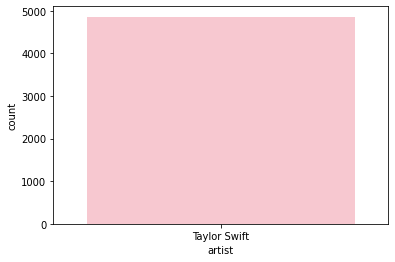

In [ ]:
sns.countplot(x='artist',data=dataset,color='pink')

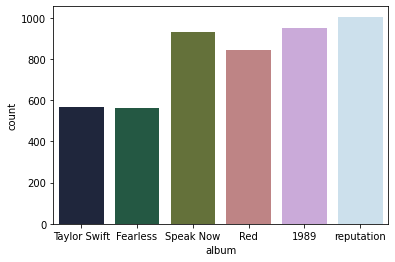

In [ ]:
sns.countplot(x='album',data=dataset,palette='cubehelix')

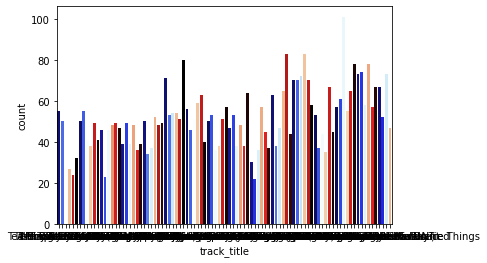

In [ ]:
sns.countplot(x='track_title',data=dataset,palette='flag_r')

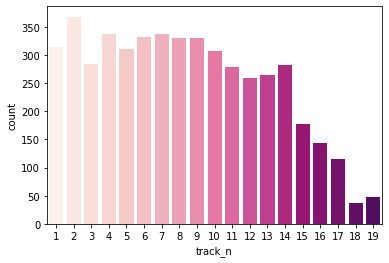

In [ ]:
sns.countplot(x='track_n',data=dataset,palette='RdPu')

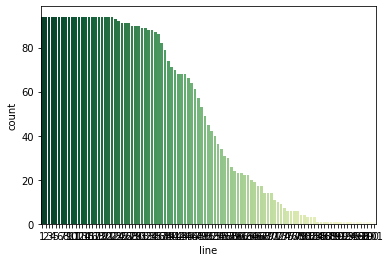

In [ ]:
sns.countplot(x='line',data=dataset,palette='YlGn_r')

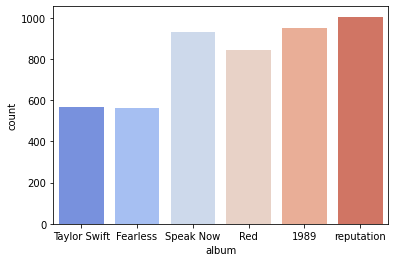

In [ ]:
sns.countplot(x='album',data=dataset,palette='coolwarm')

In [ ]:
#displaying info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       4862 non-null   object
 1   album        4862 non-null   object
 2   track_title  4862 non-null   object
 3   track_n      4862 non-null   int64 
 4   lyric        4862 non-null   object
 5   line         4862 non-null   int64 
 6   year         4862 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 266.0+ KB


In [ ]:
#function to help us process first lines of songs
def processFirstLine(lyrics, songID, songName, row):
    lyrics.append(row['lyric'] + '\n')
    songID.append( row['year']*100+ row['track_n'])
    songName.append(row['track_title'])
    return lyrics,songID,songName

In [ ]:
lyrics = [] #initializing an empty list lyrics
songID = []#initializing an empty list songID
songName = []#initializing an empty list songName

songNumber = 1 #initializing songNumber at 1

i = 0 #initializing counter i at 0

isFirstLine = True #initializing condition isFirstLine at True

for index,row in dataset.iterrows(): #iterating through dataset's rows
    if(songNumber == row['track_n']):#testing if the row belongs to the song with track_n=songNumber
        if (isFirstLine):#testing if it’s the first lyric line of the song 
    #we use function processFirstLine to store and memorize information about the song (we append row['year']*100+ row['track_n'] to songID and row['track_title'] to songName)and append the lyric line to the list lyrics .
            lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
            isFirstLine = False #changing value of isFirstLine to False
        else :# Ifthe row belongs to the song with tranck_n=songNumber but it is a non-first line lyric
            lyrics[i] +=  row['lyric'] + '\n'#concatenate the lyric of the row with the previous lines from the same song using iterator i.
    else :#If the row doesn’t belong to the song with tranck_n=songNumber
    #use the processFirstLine function to store information again about the new song and append the lyric line to the list lyrics.
        lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
    #Updating value of songNumber to track_n of the new song
        songNumber = row['track_n']
    ##Updating value of i to move to the next element of lyrics
        i+=1

In [ ]:
lyrics_data = pd.DataFrame({'songID':songID, 'songName':songName, 'lyrics':lyrics }) 
#This dataframe is a table whose columns are songID(unique identifier of the son

In [ ]:
with open('lyricsText.txt', 'w',encoding="utf-8") as filehandle:  
    for listitem in lyrics:
        filehandle.write('%s\n' % listitem)

In [ ]:
textFileName = 'lyricsText.txt'
raw_text = open(textFileName, encoding = 'UTF-8').read()
raw_text = raw_text.lower()

In [ ]:
chars = sorted(list(set(raw_text)))
int_chars = dict((i, c) for i, c in enumerate(chars))
chars_int = dict((i, c) for c, i in enumerate(chars))

In [ ]:
n_chars = len(raw_text)
n_vocab = len(chars)

In [ ]:
print('Number of Characters : ' , n_chars)
print('Number of Alphabet : ', n_vocab) 

Number of Characters :  173698
Number of Alphabet :  58


In [ ]:
seq_len = 100 #Inputs of the model will be sequences of 100 characters
data_X = []#initializing an empty list data_X that will store sequences of 100 characters
data_y = []#initializing an empty list data_y that will store targets of data_X
for i in range(0, n_chars - seq_len, 1):#looping from 1 to number of sequences of length 100 in raw_text
    seq_in  = raw_text[i:i+seq_len] #taking a sequence of length 100 from raw_text
    seq_out = raw_text[i + seq_len]#taking the character that follows the sequence
    data_X.append([chars_int[char] for char in seq_in])#mapping seq_in to integers and append it to data_X
    data_y.append(chars_int[seq_out])#mapping the seq_out to integer and append it to data_y
n_patterns = len(data_X)
print( 'Total Patterns : ', n_patterns)#number of samples

Total Patterns :  173598


In [ ]:
print( 'Total number of sequences : ', len(data_X))

Total number of sequences :  173598


In [ ]:
X = np.reshape(data_X , (n_patterns, seq_len, 1))

In [ ]:
X = X/ float(n_vocab)

In [ ]:
y = np_utils.to_categorical(data_y)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X,X_test,y,y_test=train_test_split(X,y,random_state=42)

In [ ]:
len(data_X) #total number of samples before split

173598

In [ ]:
len(X) #number of samples used in training(75%)

130198

In [ ]:
len(X_test) #number of samples used in testing(25%)

43400

In [ ]:
#to obtain same results everytime we run code
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#defining a sequential model
model = Sequential()

In [ ]:
#add an LSTM layer as input layer
model.add(LSTM(256, input_shape =(X.shape[1], X.shape[2]), return_sequences = True))

In [ ]:
#We add three LSTM layers as hidden layers with 256 nodesin each layer.
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))

In [ ]:
#We flatten the data that is coming from the last hidden layer to input it to the output layer
model.add(Flatten())

In [ ]:
#We add a dense which is a fully connected neural network layer where each input node is connected to each output node
model.add(Dense(y.shape[1]))
#We also add an activation layer that determines activation function our neural network will use to calculate the output of a node.Since it's a multiclassification problem ,we use softmax function.
model.add(Activation('softmax'))

In [ ]:
#Now we compile our model .Since it's a multiclassification problem ,we calculate the loss for each iteration of the training by using categorical cross entropy and optimise our network by using 'adam' optimizer .
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 256)          264192    
                                                                 
 lstm_1 (LSTM)               (None, 100, 256)          525312    
                                                                 
 lstm_2 (LSTM)               (None, 100, 256)          525312    
                                                                 
 lstm_3 (LSTM)               (None, 100, 256)          525312    
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 58)                1484858   
                                                                 
 activation (Activation)     (None, 58)                0

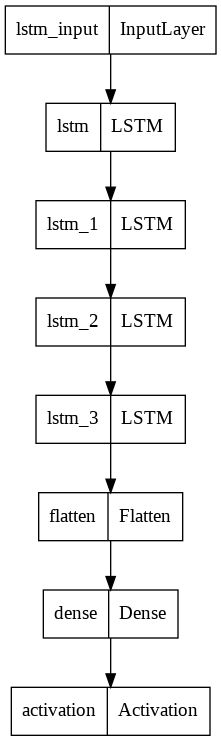

In [ ]:
from tensorflow import keras
import pydot
keras.utils.plot_model(model)

In [ ]:
#To avoid loosing our work ,we use model checkpoints so that the weights of the network nodes are saved to a file after every epoch.
checkpoint_name = 'Weights-LSTM-improvement-{epoch:03d}-{loss:.5f}-bigger.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='loss', verbose = 1, save_best_only = True, mode ='min')
callbacks_list = [checkpoint]

In [ ]:
# Fit the model :
model_params = {'epochs':10,
                'batch_size':128,
                'callbacks':callbacks_list,
                'verbose':1,
                'validation_split':0.2,
                'validation_data':None,
                'shuffle': True,
                'initial_epoch':0,
                'steps_per_epoch':None,
                'validation_steps':None}
model.fit(X,
          y,
          epochs = model_params['epochs'],
           batch_size = model_params['batch_size'],
           callbacks= model_params['callbacks'],
           verbose = model_params['verbose'],
           validation_split = model_params['validation_split'],
           validation_data = model_params['validation_data'],
           shuffle = model_params['shuffle'],
           initial_epoch = model_params['initial_epoch'],
           steps_per_epoch = model_params['steps_per_epoch'],
           validation_steps = model_params['validation_steps'])

Epoch 1/10
814/814 [==============================] - ETA: 0s - loss: 3.0174 - accuracy: 0.1749
Epoch 1: loss improved from inf to 3.01743, saving model to Weights-LSTM-improvement-001-3.01743-bigger.hdf5
814/814 [==============================] - 3464s 4s/step - loss: 3.0174 - accuracy: 0.1749 - val_loss: 3.0176 - val_accuracy: 0.1748
Epoch 2/10
814/814 [==============================] - ETA: 0s - loss: 3.0125 - accuracy: 0.1749
Epoch 2: loss improved from 3.01743 to 3.01254, saving model to Weights-LSTM-improvement-002-3.01254-bigger.hdf5
814/814 [==============================] - 3434s 4s/step - loss: 3.0125 - accuracy: 0.1749 - val_loss: 3.0155 - val_accuracy: 0.1748
Epoch 3/10
814/814 [==============================] - ETA: 0s - loss: 3.0115 - accuracy: 0.1749
Epoch 3: loss improved from 3.01254 to 3.01150, saving model to Weights-LSTM-improvement-003-3.01150-bigger.hdf5
814/814 [==============================] - 3450s 4s/step - loss: 3.0115 - accuracy: 0.1749 - val_loss: 3.0177 -

In [ ]:
#Checking the performance of the model
model.evaluate(X_test,y_test)

1357/1357 [==============================] - 669s 493ms/step - loss: 2.1851 - accuracy: 0.4100


[2.1851003170013428, 0.4100460708141327]

In [ ]:
start = np.random.randint(0, len(data_X)-1)#Returning a random number
pattern = data_X[start]#we pick a random index in the list as our starting point
print('Seed : ')
print("\"",''.join([int_chars[value] for value in pattern]), "\"\n")

generated_characters = 2000 #generating 2000 characters after initial sequence

for i in range(generated_characters):
    x = np.reshape(pattern, ( 1, len(pattern), 1))#We reshape the sequence x
    x = x / float(n_vocab)#We normalize it
    prediction = model.predict(x,verbose = 0)#We calculate the probability of each class to follow this sequence
    index = np.argmax(prediction)#We detect the index of the highest probability
    result = int_chars[index]#We map integer to character
    sys.stdout.write(result)#we display the character(result of the prediction)
    pattern.append(index)#We append this character to the sequence
    pattern = pattern[1:len(pattern)]#We remove the first character of the sequence to obtain a new sequence and repeat the same process until predicting 500 characters.
print('\nDone')

Seed : 
" hat
i'd never forget you as long as i live, and i
wish you were right here, right now
it's all good
 "

i wish you would
ii foo 00

ie,sohd
it aalk you cene beow wou wenl you cen you tein doeevt oo fall ald you went you rhe would
thet wou wast you fon the booldd wou wou drer bac wou tein you went toue
ohey wou welt doeny bod the kiv thet i was tein you cenl wou wou den tou looe thet wou want to wou art i mnow wou aoe i know wou thel the fene wou wer ald to in woer to jeve
wou wenl toule ar to doey
i conlt then you loow beau bld i got to cong toeke you are ke
you cou't know mow i muow i don't dan to wou dou't tee kest to pooi
she tiil mnt
i den't have to dod't say your sait clrge you're gom oo iec the kame to yas hoow you cen's kntw i wann you kooe you tein donl
wou cver the was the sie say mi fone
wou shat wou kee you loow baay wou want teel you benk aeln
me, the say i keve you wey hoow shet you wand teen mi the carl to thw you cone beck that io you ho wou kete mo neme
you ke